In [1]:
import skimage
import skimage.io
import os, sys
import utils
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import mywarper

## Read in top-10 eigen-warpings

In [2]:
mdict = scipy.io.loadmat("PCA_Eigen_warping.mat")
mean_LM = mdict["mean_LM"]
eigen_warping = mdict["eigen_warping"][:10, :] # top 10 eigen warpings
lamda_LM = mdict["eigen_value_LM"][0, :10] # top 10 eigen values

## Read in top-50 aligend eigen-faces

In [3]:
mdict = scipy.io.loadmat("PCA_Aligned_Eigen_Face.mat")
mean_image = mdict["mean_image"]
aligend_eigen_face = mdict["aligned_eigen_face"]
lamda_AI = mdict["eigen_value_AI"]

## Sythesis image

### Random sample seed

In [4]:
K = 50
# LM random seed 
random_LM = np.random.multivariate_normal(mean = np.zeros((10)), cov = np.diag(lamda_LM), size = K)
# AI random seed
random_AI = np.random.multivariate_normal(mean = np.zeros((50)), cov = np.diag(lamda_AI[0, :]), size = K)

In [5]:
print(random_LM.shape, eigen_warping.shape)

(50, 10) (10, 136)


### Sythesize data

In [6]:
recons_LM = np.matmul(random_LM, eigen_warping) + mean_LM
recons_LM = recons_LM.reshape((K, 68, 2))

In [7]:
recons_AI = np.matmul(random_AI, aligend_eigen_face) + mean_image
recons_AI = recons_AI.reshape((K, 128, 128, 1))

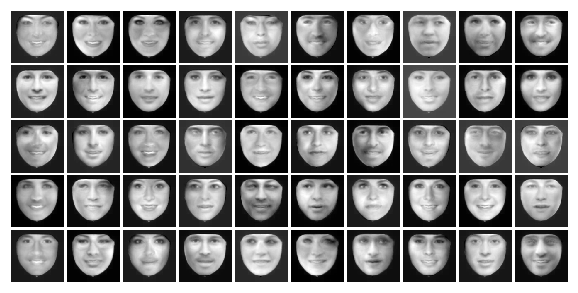

In [8]:
fig = utils.plot(recons_AI, 5, 10, 1, 128, 128)

### Combine apperance with geometry

In [9]:
Mean_LM = mean_LM.reshape((68, 2))
for i in range(K):
    final_im = mywarper.warp(recons_AI[i, :, :, :], Mean_LM, recons_LM[i, :, :])
    if i == 0:
        Final_im = np.expand_dims(final_im, axis = 0)
    else:
        Final_im = np.concatenate([Final_im, np.expand_dims(final_im, axis = 0)], axis = 0)

In [11]:
fig = utils.plot(Final_im, 5, 10, 1, 128, 128)

(50, 128, 128, 1)